# Analyse data with some charts

In [1]:
from pymongo import MongoClient
import pandas as pd
import seaborn as sns
from datetime import datetime

import sys

sys.path.insert(0, '../src')

from conf.conf import DB_SETTINGS

client = MongoClient(DB_SETTINGS['URL_CONNECT'])

In [2]:
db = client.howard
collection = db.speedtest

get_today_data_pipeline = [
    {
        '$addFields': {
            'time': 
        }
    },
    {
        '$addFields': {
            'day': {'$dayOfMonth': '$time'}
        }
    },
    {
        '$match': {
            'day': datetime.now().day-1
        }
    },
    {
        '$addFields': {
            'download': '$download.value',
            'upload': '$upload.value',
            'ping': '$ping.value'
        }
    },
    {
        '$project': {
            '_id': 0,
            'day': 0
        }
    }
]
r = collection.aggregate(get_today_data_pipeline)

data = list(r)

In [3]:
df = pd.DataFrame(data)

In [4]:
download_data = df[['download', 'time']].copy()

In [5]:
download_data['time'] = pd.to_datetime(download_data['time'])
download_data['download'] = download_data['download'].apply(lambda k: round(k/1e6, 2))

In [6]:
download_data['hour'] = download_data['time'].apply(lambda k: k.hour)

In [7]:
to_plot = download_data[['hour', 'download']].groupby('hour').mean()

In [8]:
to_plot['working'] =(to_plot.index < 17) & (to_plot.index > 8)

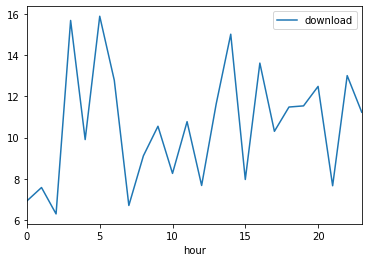

In [9]:
to_plot.plot()